In [5]:
import sys
sys.path.append('../../')
import time 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from qsopt.plots import plot_countour
from qsopt.optim import method_optim
from qsopt.search import line_search

In [15]:
import sympy as sy
from sympy import *
x1, x2 = sy.symbols("x1 x2")
func = (x1-2)**4 + (x1-2*x2)**2
print('Objective Function: ', func)
print('Gradient: ', Matrix([func]).jacobian(Matrix(list(func.free_symbols))))
print('Hessian: ', sy.hessian(func, varlist=[x1, x2]))

Objective Function:  (x1 - 2)**4 + (x1 - 2*x2)**2
Gradient:  Matrix([[-4*x1 + 8*x2, 2*x1 - 4*x2 + 4*(x1 - 2)**3]])
Hessian:  Matrix([[12*(x1 - 2)**2 + 2, -4], [-4, 8]])


In [54]:
f = lambda x: (x[0]-2)**4 + (x[0]-2*x[1])**2
grad = lambda x: np.array([-4*x[0]+8*x[1], 2*x[0]-4*x[1]+4*(x[0]-2)**3])
hess = lambda x: np.array([[12*(x[0]-2)**2, -4],[-4,8]])

initial_point = np.array([3,2])

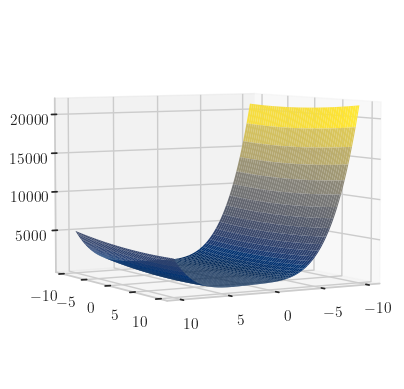

In [28]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.view_init(5, 60)
ax.plot_surface(X, Y, Z, cmap='cividis', linewidth =0)

In [56]:

def minimize(method, f, x0, grad=None, hess=None): 
    if method == 'univariant':
        x = method_optim(method_name='univariant', objective_function=f, gradient=grad, initial_point=x0)
    elif method == 'powell':
        x = method_optim(method_name='powell', objective_function=f, gradient=grad, initial_point=x0)
    elif method == 'steep_descent':
        x = method_optim(method_name='steepest_descent', objective_function=f, gradient=grad, initial_point=x0)
    elif method =='flether_reeves':
        x = method_optim(method_name='fletcher_reeves', objective_function=f, gradient=grad, initial_point=x0)
    elif method == 'bfgs':
        x = method_optim(method_name='bfgs', objective_function=f, gradient=grad, initial_point=x0)
    elif method == 'newton_raphson':
        x = method_optim(method_name='newton_raphson', objective_function=f, gradient=grad, hessian=hess, initial_point=x0)
    return x

def c(x):
    return np.array([x[0]**2 - x[1]])

def penalty_method(method, f, c, x, rho=1, beta=10, grad=None, hess=None, max_iter=100):
    for k in range(1, max_iter + 1):
        # restricoes e funcao phi
        p = lambda x: rho * np.sum(np.maximum(0, c(x))**2)
        phi = lambda x: f(x) + p(x)
        
        # miminizar 
        result = minimize(method, phi, x, grad=grad)
        x = result['xopt']

        #verificacao de parada
        if np.all(p(x) < 1e-6):
            break

        # incrementar o rho
        rho *= beta

    return x

penalty_method(method='powell', f=f, c=c, x=initial_point, rho=1, beta=10, grad=grad, hess=hess)

BracketError: The algorithm terminated without finding a valid bracket. Consider trying different initial points.